# 🧠 Projeto de Análise de Dados de Jogos Android

## 📌 Objetivo
Este projeto tem como objetivo realizar uma **análise exploratória, tratamento de dados e uma demonstragem deste dados através de gráficos** de uma tabela de jogos android.  
A análise busca identificar padrões, inconsistências e oportunidades de melhoria na base de jogos, visando apoiar decisões estratégicas.

In [1]:
## 📦 1. Importação das Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts

In [2]:
#📦 Importando o dataframe
data = pd.read_csv('android-games.csv') #Como este projeto é apenas para portfólio, decidi importar o arquivo direto da pasta

In [3]:
## 🔍 2. Começando a análise exploratória e tratamento de dados
data.info() #Descobrindo os tipo dos Dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   int64  
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(3)
memory usage: 191.0+ KB


In [4]:
data.shape #Descobrindo o tamanho da tabela

(1730, 15)

In [5]:
data['rank'].describe() #Verificando se há algum tipo de inconsistência na tabela de ranking

count    1730.000000
mean       50.386705
std        28.936742
min         1.000000
25%        25.000000
50%        50.000000
75%        75.000000
max       100.000000
Name: rank, dtype: float64

In [6]:
data.isnull().sum() #Verificando se há algum tipo de dados NA

rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

In [7]:
data['category'] = data['category'].str.title() #Padronizando a coluna 'category', colocando os nomes em maiúsculos

In [8]:
data['installs'] = (
    data['installs']
    .replace({'M': '', 'k': ''}, regex=True)
    .astype(float)
) #Modificando as letras ta coluna installs, para modificá-la para float

In [10]:
data['installs'] = pd.to_numeric(data['installs'], errors='coerce') #Modificando os tipo de dados que são inconsistente, neste caso de object para float

In [15]:
data.loc[data['price'] < 0] #Verificando se há algum valor inconsistente na coluna price

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid


In [16]:
data.loc[data['growth (30 days)'] < 0] #Verificando se há algum valor inconsistente na coluna growth (30 days)

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid


In [27]:
data.loc[data['installs'] < 0] #Verificando se há algum valor inconsistente na coluna installs

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid


In [28]:
data.loc[data['growth (60 days)'] < 0] #Verificando se há algum valor inconsistente na coluna growth (60 days)

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid


## Terminamos aqui a parte de análise exploratória e tratamentos de dados
# Esse DataFrame veio do site Kaggle, ou seja, não há muitas inconsistências nos dados
# Porém, ainda assim, conseguimos melhorar os dados e deixa-lo mais otimizado, visando a próxima etapa.

In [ ]:
## 📊 3 - Demonstragem de dados
jogosPagos = data.loc[data['price'] > 0][['title', 'price']] #Colocando todos os jogos pagos em uma variável

[Text(0.5, 1.0, 'Histograma de Preços')]

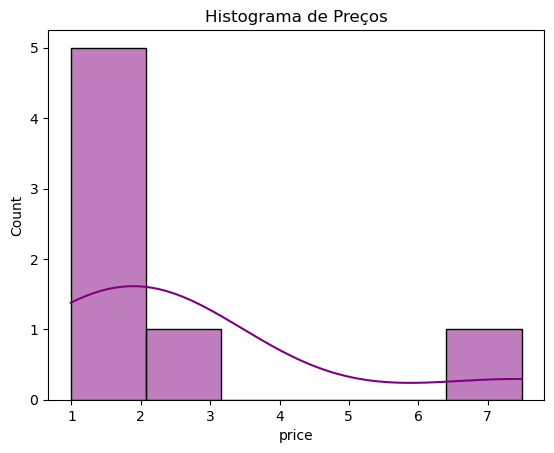

In [17]:
sns.histplot(jogosPagos['price'], kde=True, bins=6, color='purple').set(title='Histograma de Preços') #Demonstramos um gráfico que apresenta a distribuição dos preços dos jogos, acompanhado de uma curva de densidade, permitindo observar a variação e a concentração dos valores 

In [18]:
pagoOuNao = data.groupby(['paid']).size() #Separamos a quantidade dos jogos pagos e os jogos grátis

paid
False    1723
True        7
dtype: int64

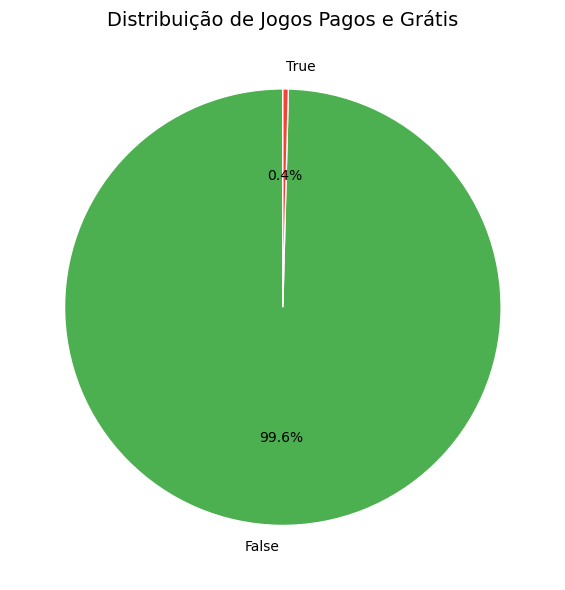

In [19]:
plt.figure(figsize=(6, 6))
plt.pie(
    pagoOuNao,
    labels=pagoOuNao.index,
    autopct='%1.1f%%',        # mostra porcentagem
    startangle=90,
    colors=['#4CAF50', '#F44336'],  # verde e vermelho
    wedgeprops={'edgecolor': 'white'}
)

plt.title('Distribuição de Jogos Pagos e Grátis', fontsize=14)
plt.tight_layout()
plt.show() # E agora utilizamos um gráfico de setor, para demonstrar a distribuição de jogos grátis ou não. Optei por este gráfico, pois temos apenas dois valores

In [20]:
#Nesta célula, vamos colocar os dados que utilizaremos nos próximos gráficos, em variáveis.
melhoresJogos = data.nlargest(5, 'total ratings')[['title', 'total ratings']]#Colocando o TOP 5 melhores jogos em uma varíavel.
jogosMaisBaixados = data.nlargest(5, 'installs')[['title', 'installs']]#Colocando o TOP 5 jogos com mais downloads em uma varíavel.
jogosQueMaisCresceramBimestre = data.nlargest(5, 'growth (60 days)')[['title', 'growth (60 days)']]#Colocando o TOP 5 jogos que mais cresceram nos últimos 60 dias.
categoriasMaisEvidentes = data.nlargest(100, 'average rating')[['title', 'category']]#Colocando a categoria mais evidente, nos 100 jogos com maiores notas.
categoriasMaisBemAvaliadas = categoriasMaisEvidentes['category'].value_counts().reset_index()#Fazendo a contagem de cada categoria do TOP 100 jogos
categoriasMaisBemAvaliadas.columns = ['category', 'total'] #Separando os valores da coluna para utilizar num gráfico
jogosMaisCaros = jogosPagos.nlargest(5, 'price')[['title', 'price']] #Colocando o TOP 5 jogos mais caros numa variável

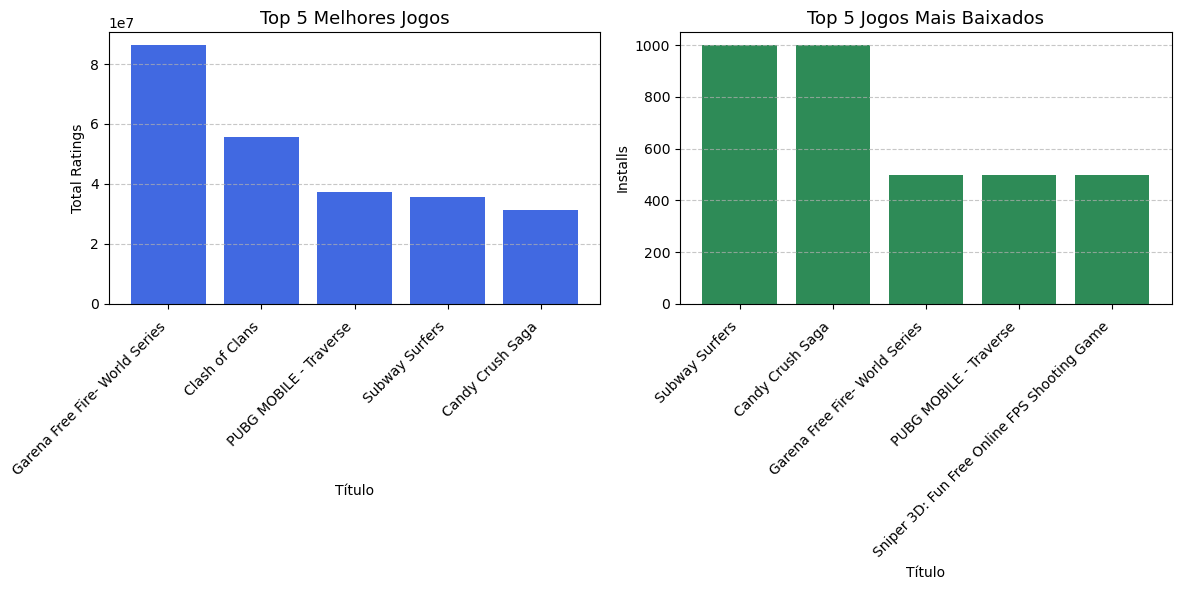

In [21]:
#Nesta célula demonstraremos dois gráficos, um com os melhores jogos e o outro com os jogos mais baixados
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) #Utilizaremos gráficos de barras para estas categorias

axes[0].bar(melhoresJogos['title'], melhoresJogos['total ratings'], color='royalblue') #Informando de onde o gráfico deve extrair os dados que serão mostrados
axes[0].set_title('Top 5 Melhores Jogos', fontsize=13) #Escolhendo o título do gráfico
axes[0].set_xlabel('Título') #Escolhendo o nome do dado da linha horizontal do gráfico 
axes[0].set_ylabel('Total Ratings') #Escolhendo o nome do dado da linha vertical do gráfico 

axes[0].tick_params(axis='x', rotation=45, labelsize=10, pad=8) #Escolhendo os parametros do gráfico
for tick in axes[0].get_xticklabels():
    tick.set_ha('right')  # alinha os nomes à direita, fica visualmente mais equilibrado

axes[0].grid(axis='y', linestyle='--', alpha=0.7) #Personalizando as linhas do gráfico

axes[1].bar(jogosMaisBaixados['title'], jogosMaisBaixados['installs'], color='seagreen') #Informando de onde o gráfico deve extrair os dados que serão mostrados
axes[1].set_title('Top 5 Jogos Mais Baixados', fontsize=13) #Escolhendo o título do gráfico
axes[1].set_xlabel('Título') #Escolhendo o nome do dado da linha horizontal do gráfico
axes[1].set_ylabel('Installs') #Escolhendo o nome do dado da linha vertical do gráfico 

axes[1].tick_params(axis='x', rotation=45, labelsize=10, pad=8) #Escolhendo os parametros do gráfico
for tick in axes[1].get_xticklabels():
    tick.set_ha('right') # alinha os nomes à direita, fica visualmente mais equilibrado

axes[1].grid(axis='y', linestyle='--', alpha=0.7 #Personalizando as linhas do gráfico

plt.tight_layout()
plt.show() #Mostrando o gráfico


/tmp/ipykernel_478/1963391490.py:10: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_478/1963391490.py:10: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_478/1963391490.py:10: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_478/1963391490.py:10: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_478/1963391490.py:10: UserWarning: Glyph 50999 (\N{HANGUL SYLLABLE YUC}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_478/1963391490.py:10: UserWarning: Glyph 45440 (\N{HANGUL SYLLABLE NOL}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_478/1963391490.py:10: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.tight_layout()
/opt/conda/envs/anaconda-panel-2023.05-py310/li

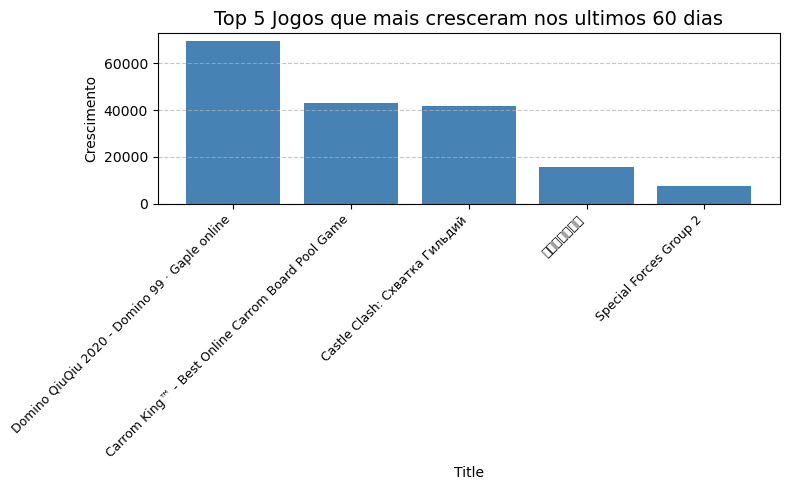

In [29]:
#Nesta célula, demonstraremos um gráfico com os jogos que mais 'cresceram', nos últimos 60 dias
plt.figure(figsize=(8, 5))
plt.bar(jogosQueMaisCresceramBimestre['title'], jogosQueMaisCresceramBimestre['growth (60 days)'], color='steelblue') #Informando de onde o gráfico deve extrair os dados que serão mostrados

plt.title('Top 5 Jogos que mais cresceram nos ultimos 60 dias', fontsize=14) #Escolhendo o título do gráfico
plt.xlabel('Title') #Escolhendo o nome do dado da linha horizontal do gráfico 
plt.ylabel('Crescimento') #Escolhendo o nome do dado da linha vertical do gráfico 
plt.xticks(rotation=45, ha='right', fontsize=9) # alinha os nomes à direita, fica visualmente mais equilibrado
plt.grid(axis='y', linestyle='--', alpha=0.7) #Personalizando as linhas do gráfico
plt.tight_layout()

In [ ]:
#Nesta célula, demonstraremos um gráfico com as categorias com os jogos mais avaliados
sns.barplot(
    data=categoriasMaisBemAvaliadas,
    x='category',
    y='total',
    hue='category',      
    dodge=False,         
    palette='Set2'       
) #Informando de onde o gráfico deve extrair os dados que serão mostrados
plt.title('Categorias Mais Bem Avaliadas') #Escolhendo o título do gráfico
plt.xlabel('Categoria') #Escolhendo o nome do dado da linha horizontal do gráfico 
plt.ylabel('Quantidade') #Escolhendo o nome do dado da linha vertical do gráfico 
plt.xticks(rotation=45)
plt.legend([],[], frameon=False) 
plt.show()

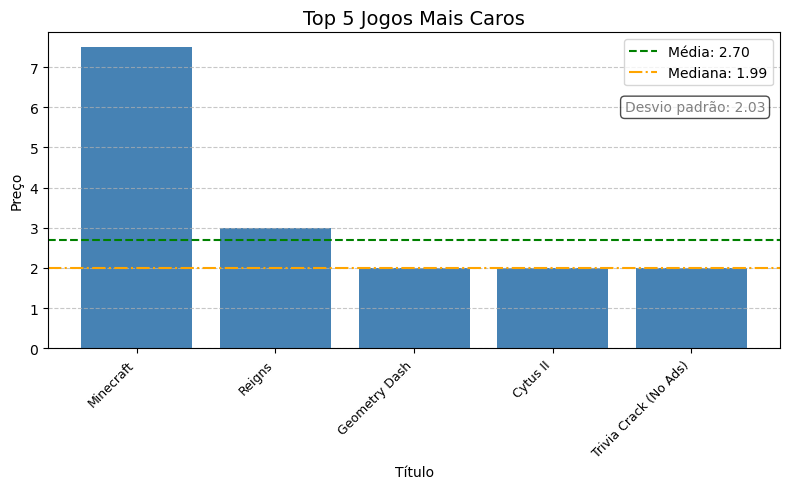

In [26]:
#Nesta célula, demonstraremos um gráfico com os jogos mais caros, além dos preço dos jogos, informaremos a média, a mediana e o desvio padrão destes preços

plt.figure(figsize=(8, 5))
plt.bar(jogosMaisCaros['title'], jogosMaisCaros['price'], color='steelblue') #Informando de onde o gráfico deve extrair os dados que serão mostrados

mediaPreco = sts.mean(jogosPagos['price']) #Conseguindo o valor da média
desvioPadrao = np.std(jogosPagos['price']) #Conseguindo o valor do desvio padrão
medianaPreco = sts.median(jogosPagos['price']) #Conseguindo o valor da mediana

plt.axhline(mediaPreco, color='green', linestyle='--', linewidth=1.5, label=f'Média: {mediaPreco:.2f}') #Alinhando e personalizando a linha onde ficará o valor da média
plt.axhline(medianaPreco, color='orange', linestyle='-.', linewidth=1.5, label=f'Mediana: {medianaPreco:.2f}') #Alinhando e personalizando a linha onde ficará o valor da mediana

plt.title('Top 5 Jogos Mais Caros', fontsize=14) #Escolhendo o título do gráfico
plt.xlabel('Título') #Escolhendo o nome do dado da linha horizontal do gráfico
plt.ylabel('Preço')  #Escolhendo o nome do dado da linha vertical do gráfico
plt.xticks(rotation=45, ha='right', fontsize=9) #Personalizando os rótulos
plt.grid(axis='y', linestyle='--', alpha=0.7) #Personalizando as linhas

plt.legend()

plt.text(0.98, 0.75,
         f'Desvio padrão: {desvioPadrao:.2f}',
         transform=plt.gca().transAxes,
         fontsize=10,
         color='gray',
         ha='right',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7)) #Alinhando e personalizando onde ficará o valor do desvio padrão

plt.tight_layout()
plt.show()

## ✅ 4 - Conclusão
# Dados apresentavam inconsistências de formatação e valores nulos, corrigidos durante o processo.
# As categorias de 'Game Action" concentram a maior parte dos jogos mais bem avaliados.
# As grande maioria dos jogos são grátis, e os que são pagos tem um custo baixo.
# O jogo 'Garena Free Fire - World Series' foi o jogo melhor avaliado, inclusive foi o jogo com a maior moda entre os gráficos de 'TOP 5'
## 🚀 Próximos passos:
# Criar dashboards interativos através do Power BI.
# Automatizar a limpeza de dados para futuras importações.

## 💾 6. Sobre o Projeto
# 📅 Desenvolvido em: 11 de Novembro de 2025
# 👨‍💻 Autor: [Jatanael Guilherme]
# 📧 Contato: jata.dev1976@gmail.com
# 📎 Repositório: [link do GitHub]